**Lab 2a**

*Given Code*

In [2]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# Define data filepath
pathname = '/path/to/wildfire_data/'

# Read data
df = gpd.read_file('wildfire_data/or_1992-2018.shp') # 'df' stands for DataFrame

In [4]:
# Find column labels
df.columns

# Find columns datatypes
df.dtypes

OBJECTID       float64
FOD_ID           int64
FPA_ID          object
SOURCE_SYS      object
SOURCE_S_1      object
NWCG_REPOR      object
NWCG_REP_1      object
NWCG_REP_2      object
SOURCE_REP      object
SOURCE_R_1      object
LOCAL_FIRE      object
LOCAL_INCI      object
FIRE_CODE       object
FIRE_NAME       object
ICS_209_PL      object
ICS_209__1      object
MTBS_ID         object
MTBS_FIRE_      object
COMPLEX_NA      object
FIRE_YEAR        int64
DISCOVERY_      object
DISCOVER_1       int64
DISCOVER_2      object
NWCG_CAUSE      object
NWCG_GENER      object
NWCG_CAU_1      object
CONT_DATE       object
CONT_DOY       float64
CONT_TIME       object
FIRE_SIZE      float64
FIRE_SIZE_      object
LATITUDE       float64
LONGITUDE      float64
OWNER_DESC      object
STATE           object
COUNTY          object
FIPS_CODE       object
FIPS_NAME       object
geometry      geometry
dtype: object

In [5]:
# Get some stats for numeric columns
df['FIRE_SIZE'].describe()

count     67042.000000
mean        144.878795
std        3815.600420
min           0.010000
25%           0.100000
50%           0.100000
75%           0.330000
max      558198.300000
Name: FIRE_SIZE, dtype: float64

In [6]:
# Filter fires larger than 100 acres
df_large = df[df['FIRE_SIZE'] > 100]

In [7]:
# Find mean size of wildfires larger than 100 acres
df_large['FIRE_SIZE'].mean()

5077.047927022739

In [8]:
# Find the different cause of large wildfires
df_large['NWCG_CAUSE'].unique()

array(['Human', 'Natural', 'Missing data/not specified/undetermined'],
      dtype=object)

In [9]:
# Filter fires that were caused by natural causes
df_large_natural = df_large[df_large['NWCG_CAUSE'] == 'Natural']

In [10]:
# Find date of discovery
df_large_natural['DISCOVERY_']

56       2008/07/02 00:00:00.000
89       2000/07/22 00:00:00.000
95       2007/08/31 00:00:00.000
96       2003/06/29 00:00:00.000
109      2007/07/13 00:00:00.000
                  ...           
67007    2017/08/29 00:00:00.000
67008    2011/09/15 00:00:00.000
67014    2014/09/16 00:00:00.000
67017    2013/08/07 00:00:00.000
67022    2016/08/17 00:00:00.000
Name: DISCOVERY_, Length: 1164, dtype: object

In [11]:
datetime = pd.to_datetime(df_large_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
datetime

56      2008-07-02
89      2000-07-22
95      2007-08-31
96      2003-06-29
109     2007-07-13
           ...    
67007   2017-08-29
67008   2011-09-15
67014   2014-09-16
67017   2013-08-07
67022   2016-08-17
Name: DISCOVERY_, Length: 1164, dtype: datetime64[ns]

In [12]:
df_large_natural['datetime'] = datetime

C:\Users\sshul\anaconda3\envs\lab2\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [13]:
# Filter large, natural wildfires in 2016
df_large_natural_2016 = df_large_natural[df_large_natural['datetime'].dt.year == 2016]

In [14]:
# Find number of large fires in each year (i.e. number of rows in each year)
large_fire_count = df_large.iloc[:,0].groupby(df_large_natural['datetime'].dt.year).count()

In [15]:
# Find acres of wildfire for each year
large_fire_area = df_large['FIRE_SIZE'].groupby(df_large_natural['datetime'].dt.year).sum()

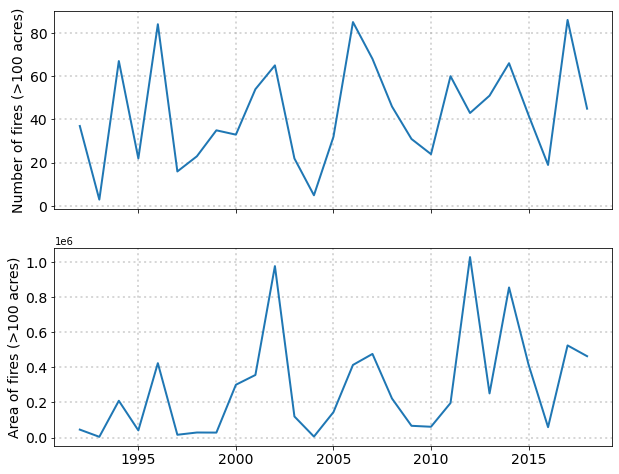

In [16]:
# Plot number and acres of wildfire for each year
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)
ax1.plot(large_fire_count, lw=2)
ax1.set_ylabel('Number of fires (>100 acres)', fontsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.grid(ls='dotted', lw=2, alpha=0.5)

ax2.plot(large_fire_area, lw=2)
ax2.set_ylabel('Area of fires (>100 acres)', fontsize=14)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.grid(ls='dotted', lw=2, alpha=0.5)

*Question One*

In [17]:
''' Which county had the most human caused wildfires >50 acres?'''

df_large = df[df['FIRE_SIZE'] > 50]
df_large_anthro = df_large[df_large['NWCG_CAUSE'] == 'Human']
answer = df_large_anthro['COUNTY'].value_counts().index[0]

In [18]:
print("The county with the most wildfires is %s County." %answer)

The county with the most wildfires is Malheur County.


In [19]:
'''Which month had the most natural caused wildfires >100'''
df_large = df[df['FIRE_SIZE'] > 100]
df_large_natural = df_large[df_large['NWCG_CAUSE'] == 'Natural']
datetime = pd.to_datetime(df_large_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
df_large_natural['datetime'] = datetime
#df_large_natural.info()
answer = df_large_natural.iloc[:,0].groupby(df_large_natural['datetime'].dt.month).count().sort_values(ascending=False).index[0]
print(answer)

8


C:\Users\sshul\anaconda3\envs\lab2\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [20]:
print("The month with the most wildfires is month %s ." %answer)

The month with the most wildfires is month 8 .


In [21]:
'''How many fires >200 acres have an undetermined cause?'''
df_large = df[df['FIRE_SIZE'] > 200]
df_large_undetermined = df_large[df_large['NWCG_CAUSE'] == 'Missing data/not specified/undetermined']
answer = len(df_large_undetermined)
print(answer)

13


In [22]:
print('There are %s fires with an undetermined or missing cause.' %answer)

There are 13 fires with an undetermined or missing cause


In [23]:
'''What is the name, date, and county of the largest fire?'''
largest = df[df.FIRE_SIZE == df.FIRE_SIZE.max()]
largest[["FIRE_NAME","DISCOVERY_", "COUNTY"]]

,FIRE_NAME,DISCOVERY_,COUNTY
66964,LONG DRAW,2012/07/08 00:00:00.000,Malheur


In [24]:
'''How many wildfires in Lane Couny were >50?'''
df_lc = df[df['COUNTY'] == "Lane"]
dflc_large = df[df['FIRE_SIZE'] > 50]
answer = len(dflc_large)
print(answer)

2409


In [25]:
print('There were %s wildfires in Lane County larger than 50 acres.' %answer)

There were 2409 wildfires in Lane County larger than 50 acres.


**Lab 2b**

*Given Code*

In [26]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)

In [27]:
# Download data
lane_pop = products.ACS(2019).from_county('Lane County, OR', level='tract',
                                        variables=['B01003_001E'])

C:\Users\sshul\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sshul\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sshul\anaconda3\envs\lab2\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` paramete

In [28]:
# Calculate some stats
lane_pop['B01003_001E'].describe()

count      87.000000
mean     4291.264368
std      1506.689737
min         0.000000
25%      3287.500000
50%      4068.000000
75%      5205.000000
max      8932.000000
Name: B01003_001E, dtype: float64

<AxesSubplot:>

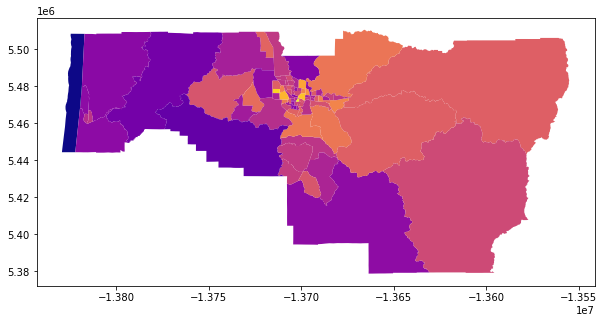

In [29]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
lane_pop.plot('B01003_001E', ax=ax, cmap='plasma')

<AxesSubplot:>

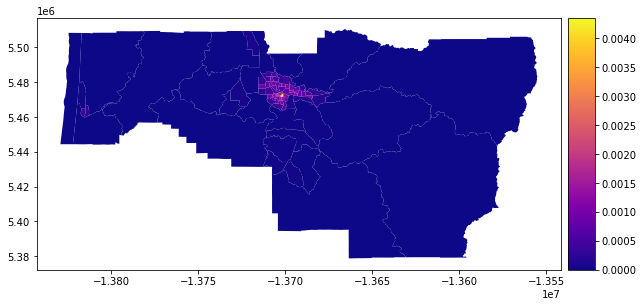

In [30]:
lane_pop['pop_density'] = lane_pop['B01003_001E'] / lane_pop['geometry'].area

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

lane_pop.plot('pop_density', ax=ax, cmap='plasma', legend=True, cax=cax)

*Question Two*

In [37]:
# Download data
lane_plumbing = products.ACS(2019).from_county('Lane County, OR', level='tract',
                                        variables=['B25047_003E'])
#lane_heat.info()

C:\Users\sshul\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sshul\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sshul\anaconda3\envs\lab2\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` paramete

<AxesSubplot:>

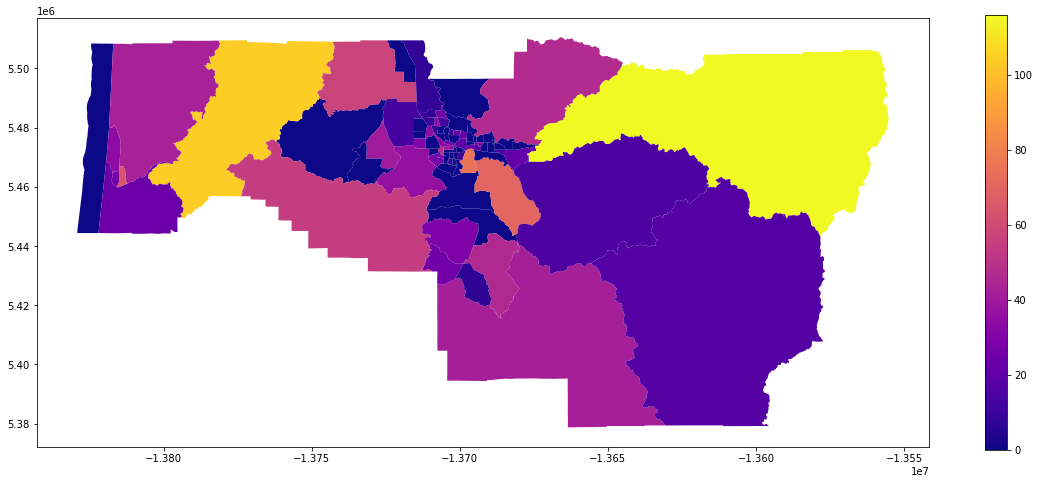

In [50]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(20,8))
lane_plumbing.plot('B25047_003E', ax=ax, cmap='plasma', legend=True)

In [53]:
statement = '''The map above shows the number of households without adequate plumbing per census tract in Lane County. This map shows that areas that are more urban such as Eugene (center) have higher levels of adequate plumbing than more rural areas such as the tract containing WillametteNational Forest (right). '''

print(statement)

The map above shows the number of households without adequate plumbing per census tract in Lane County. This map shows that areas that are more urban such as Eugene (center) have higher levels of adequate plumbing than more rural areas such as the tract containing WillametteNational Forest (right). 
